## Imports and Reading Data

In [1]:
%%capture
! pip install ucimlrepo skimpy

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import skim
from ucimlrepo import fetch_ucirepo 

In [3]:
 # fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 

df = pd.DataFrame(X)
df['target'] = y
print(df.shape)
df.head()

(699, 10)


,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,target
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [4]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 699    │ │ int32       │ 9     │                                                          │
│ │ Number of columns │ 10     │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA   ┃ NA %   ┃ mean   ┃ sd     ┃ p0  ┃ p25   ┃ p50  ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Clump_thickness            │    0 │      0 │    4.4 │    2.8 │   1 │     2 │    4 │    6 │    10 │ ▇▅▇▁▃▃  │  │
│ │ Uniformity_of_cell_size    │    0 │      0 │    3.1 │    3.1 │   1 │     1 │    1 │    5 │    10 │ ▇▁▁▁▁▁  │  │
│ │ Uniformity_of_cell_shape   │    0 │      0 │    3.2 │      3 │   1 │     1 │    1 │    5 │    10 │ ▇▁▂▁▁▁  │  │
│ │ Marginal_adhesion          │    0 │      0 │    2.8 │    2.9 │   1 │     1 │    1 │    4 │    10 │ ▇▁▁ ▁▁  │  │
│ │ Single_epithelial_cell_siz │    0 │      0 │    3.2 │    2.2 │   1 │     2 │    2 │    4 │    10 │ ▇▁▂▁▁▁  │  │
│ │ e                          │      │        │        │        │     │       │      │      │       │         │  │
│ │ Bare_nuclei                │   16 │   2.29 │    3.5 │    3.6 │   1 │     1 │    1 │    6 │    10 │ ▇▁▁ ▁▃  │  │
│ │ Bland_chromatin            │    0 │      0 │    3.4 │    2.4 │   1 │     2 │    3 │    5 │    10 │ ▇▅▂ ▃▁  │  │
│ │ Normal_nucleoli            │    0 │      0 │    2.9 │    3.1 │   1 │     1 │    1 │    4 │    10 │ ▇▁▁ ▁▁  │  │
│ │ Mitoses                    │    0 │      0 │    1.6 │    1.7 │   1 │     1 │    1 │    1 │    10 │    ▇    │  │
│ │ target                     │    0 │      0 │    2.7 │   0.95 │   2 │     2 │    2 │    4 │     4 │ ▇    ▅  │  │
│ └────────────────────────────┴──────┴────────┴────────┴────────┴─────┴───────┴──────┴──────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [5]:
#df['Bare_nuclei'].value_counts()
total_null_values = df['Bare_nuclei'].isna().sum()

df = df.dropna(subset="Bare_nuclei")
## Benign cases are already a lot more, hence I decide to get rid of the rows with NaN value for bare_nuclei

df['Bare_nuclei'] = df['Bare_nuclei'].astype('int32')
df['Bare_nuclei'].dtype

dtype('int32')

In [6]:
df.shape

(683, 10)

### Column-wise Data Analysis

In [7]:
import os
os.makedirs("plots_for_analysis")
save_path = 'plots_for_analysis'

Benign cases (id = 2): 65.0%
Malignant cases (id = 4): 35.0%


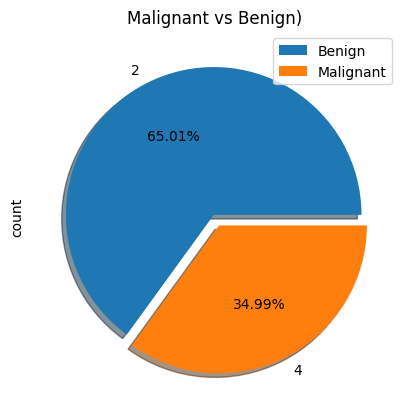

In [8]:
item = list(round(df["target"].value_counts(2), 2))

print(f"Benign cases (id = 2): {item[0]*100}%")
print(f"Malignant cases (id = 4): {item[1]*100}%")

df["target"].value_counts().plot.pie(explode=[0.01, 0.07], autopct="%.2f%%", shadow=True)
plt.title("Malignant vs Benign)")
plt.legend(labels=['Benign', 'Malignant'])
plt.savefig(f"{save_path}/pie_plot.png")

In [9]:
#df[df["target"]==4].sample(5)
df.query('target == 2').sample(5)

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,target
578,1,1,1,1,2,1,2,1,1,2
448,1,1,1,1,1,1,1,1,1,2
426,5,3,6,1,2,1,1,1,1,2
537,5,1,2,1,2,1,3,1,1,2
35,2,1,1,1,2,1,2,1,1,2


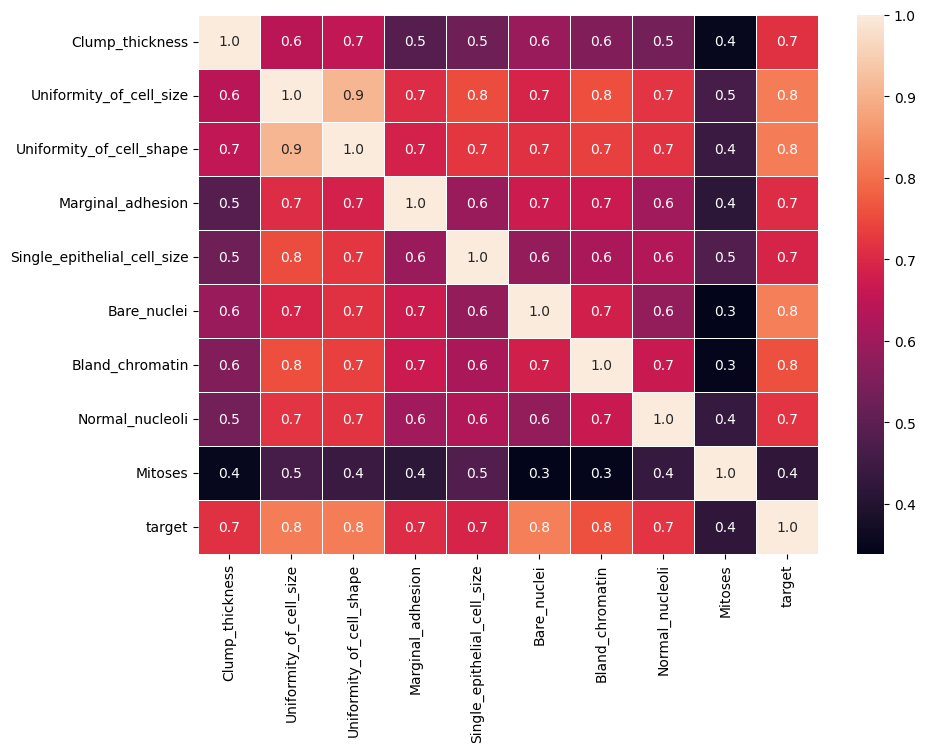

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, fmt=".1f")

plt.savefig(f"{save_path}/corr_matrix.png")

skewness in column Clump_thickness: 0.587654236122398


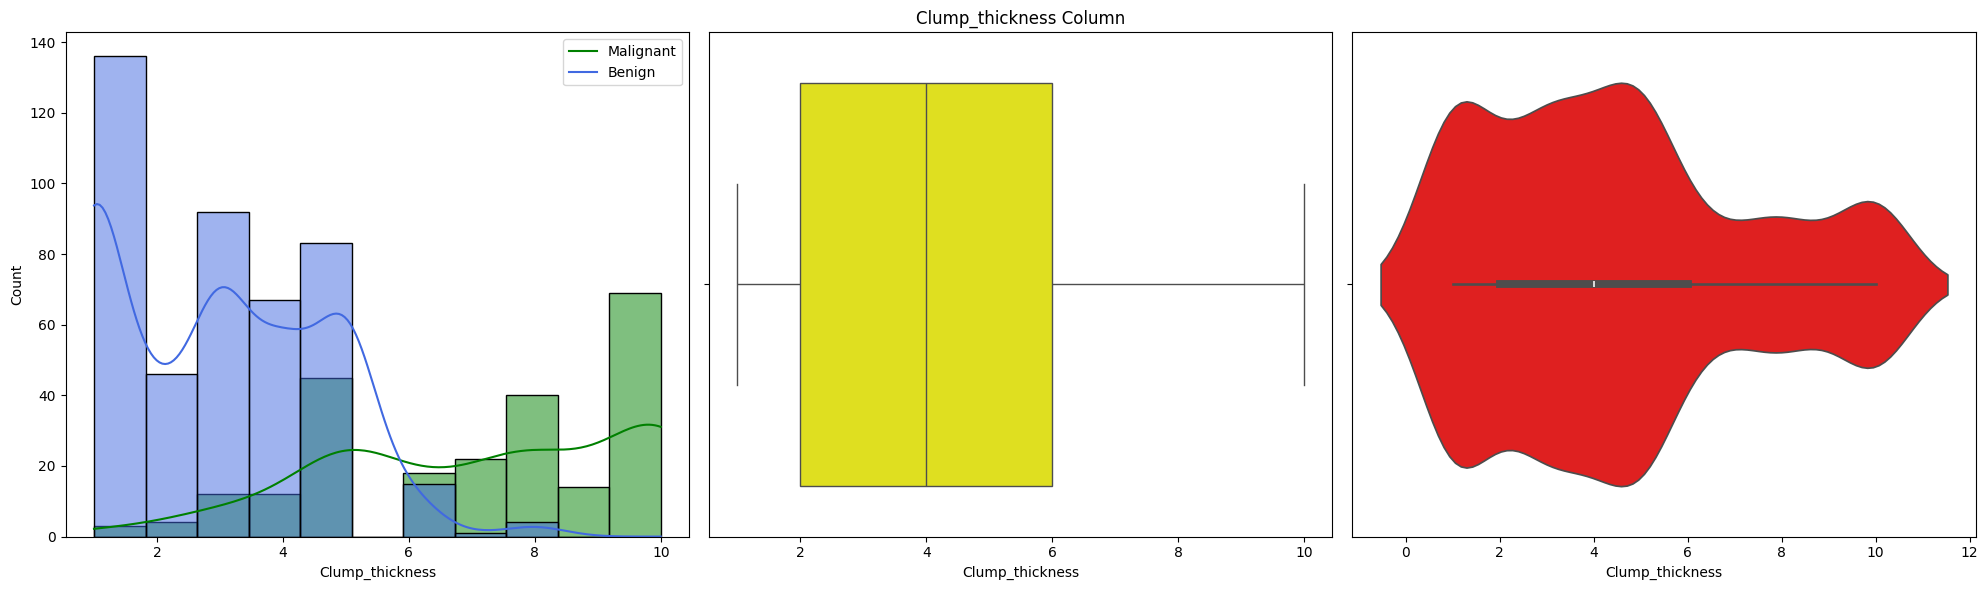

skewness in column Uniformity_of_cell_size: 1.226404095656918


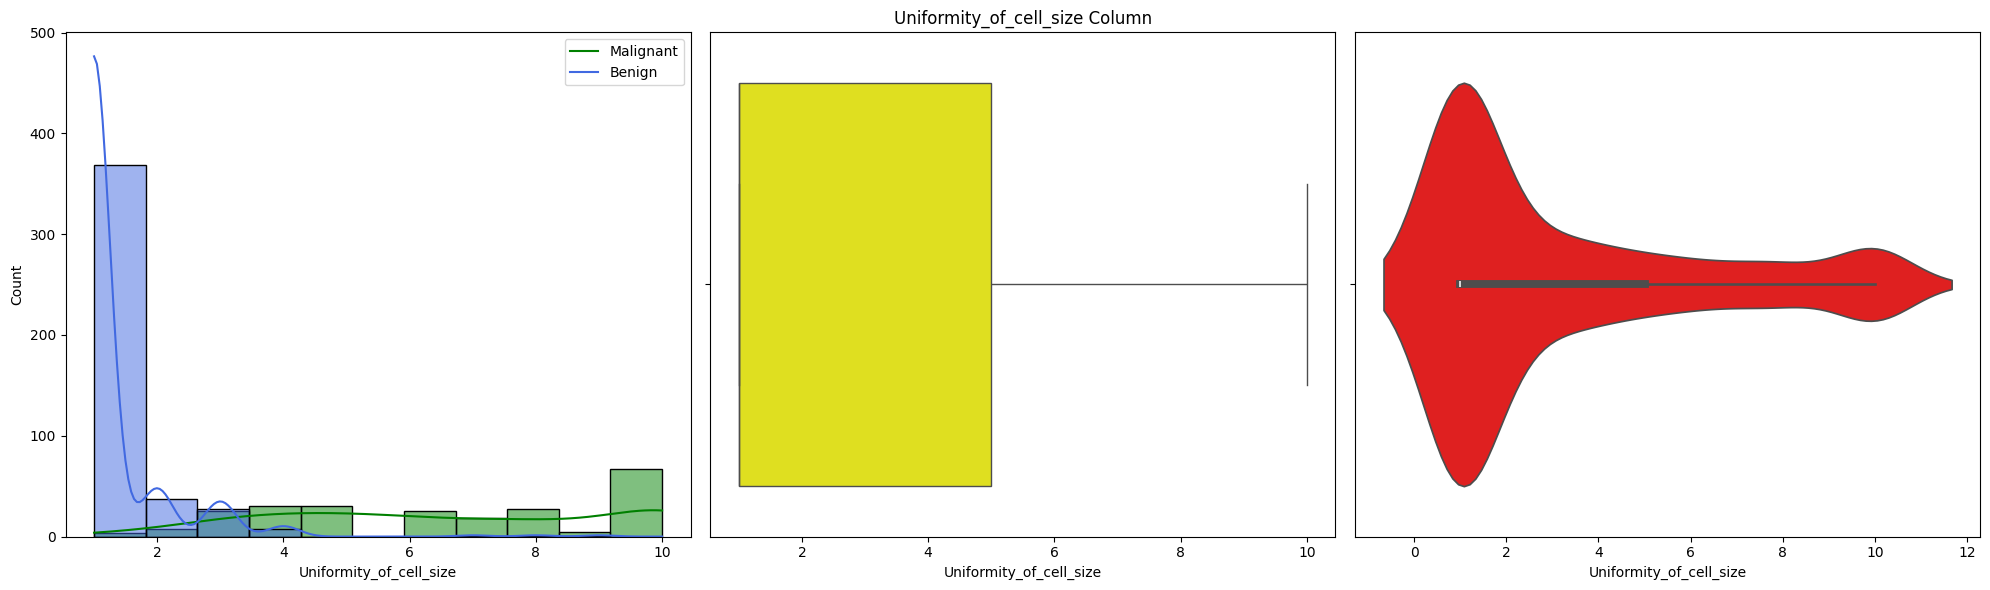

skewness in column Uniformity_of_cell_shape: 1.1578900118848368


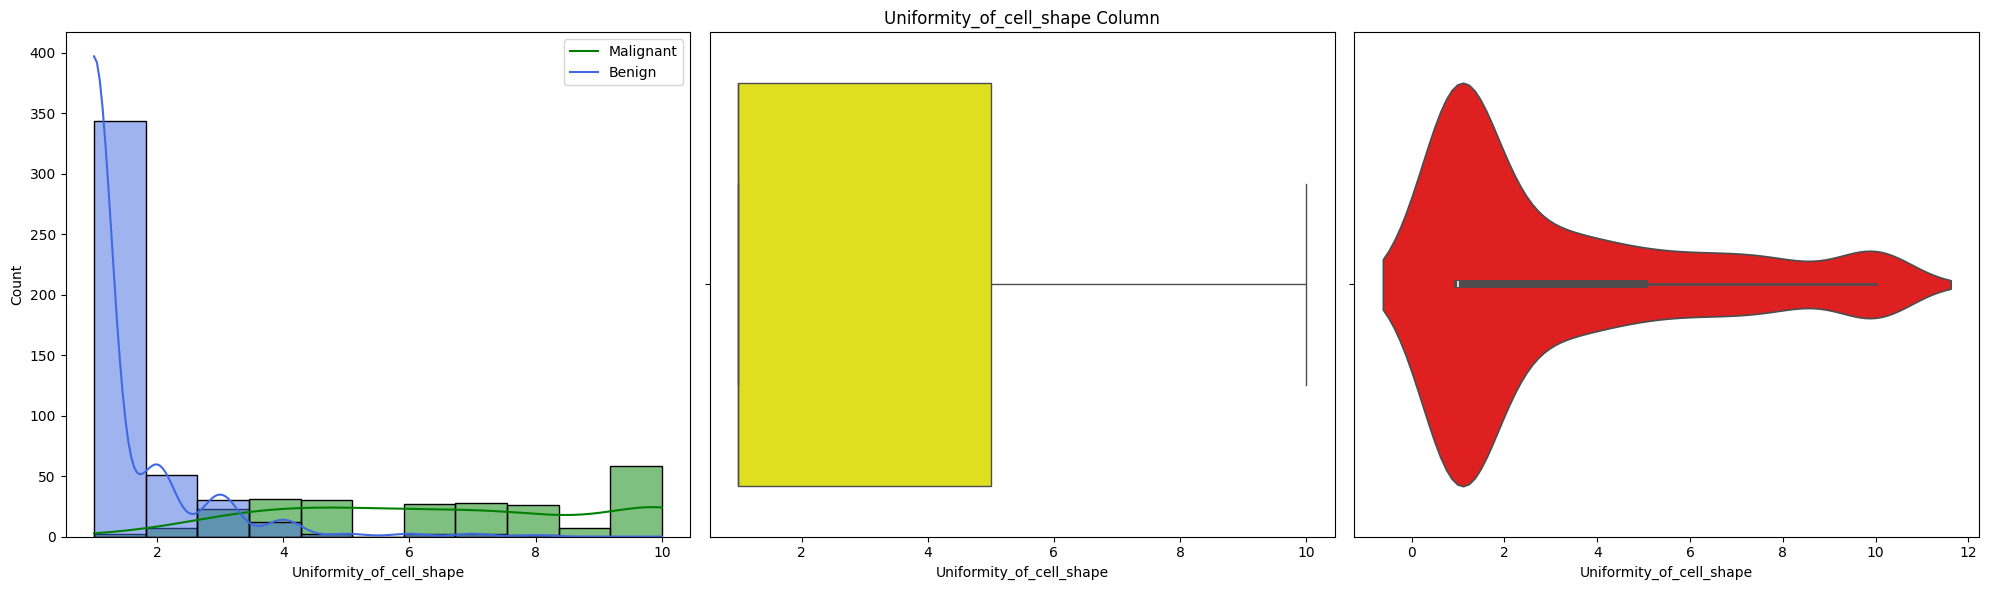

skewness in column Marginal_adhesion: 1.5091810637421226


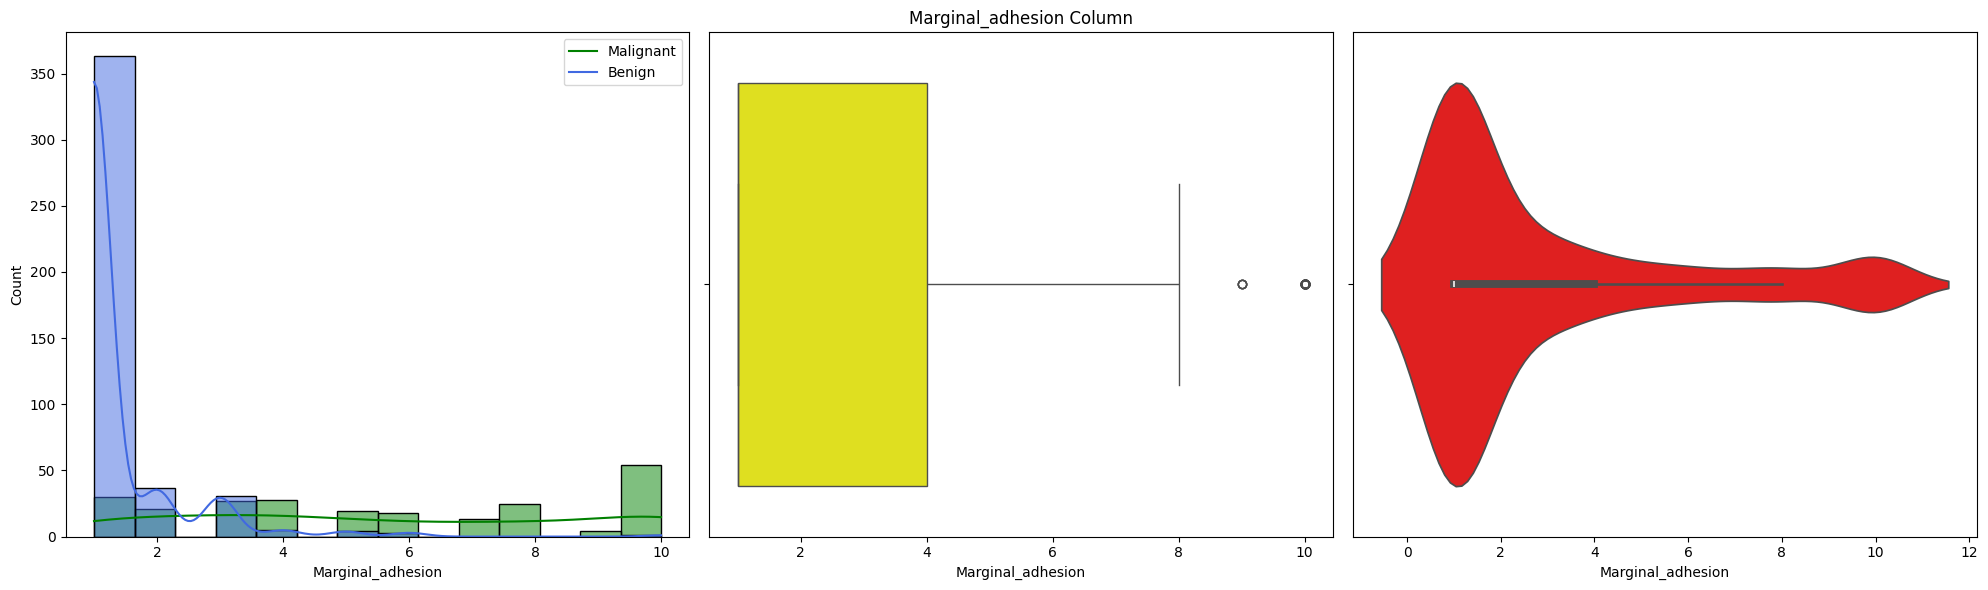

skewness in column Single_epithelial_cell_size: 1.703716401246096


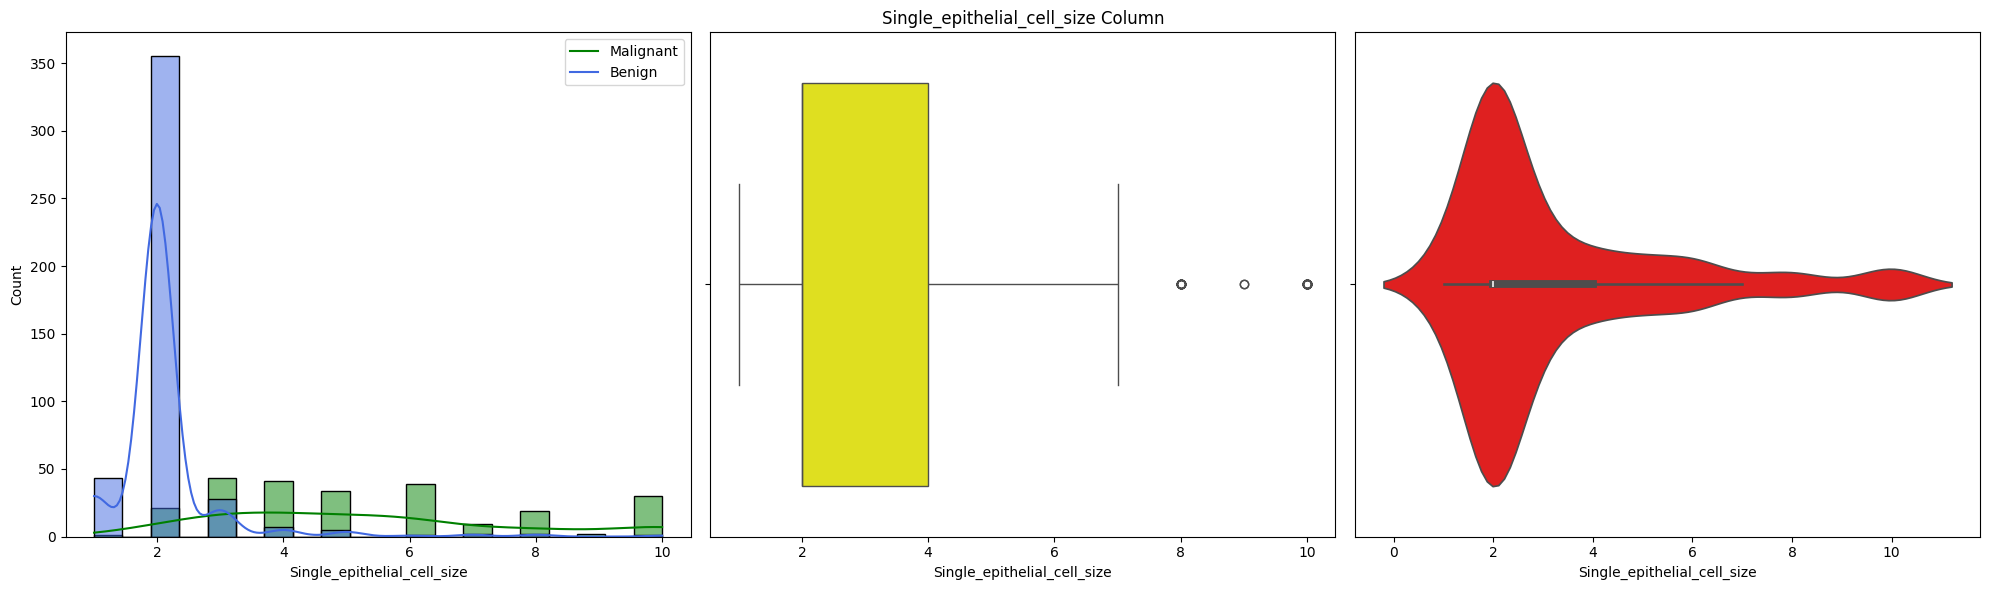

skewness in column Bare_nuclei: 0.9900156547006164


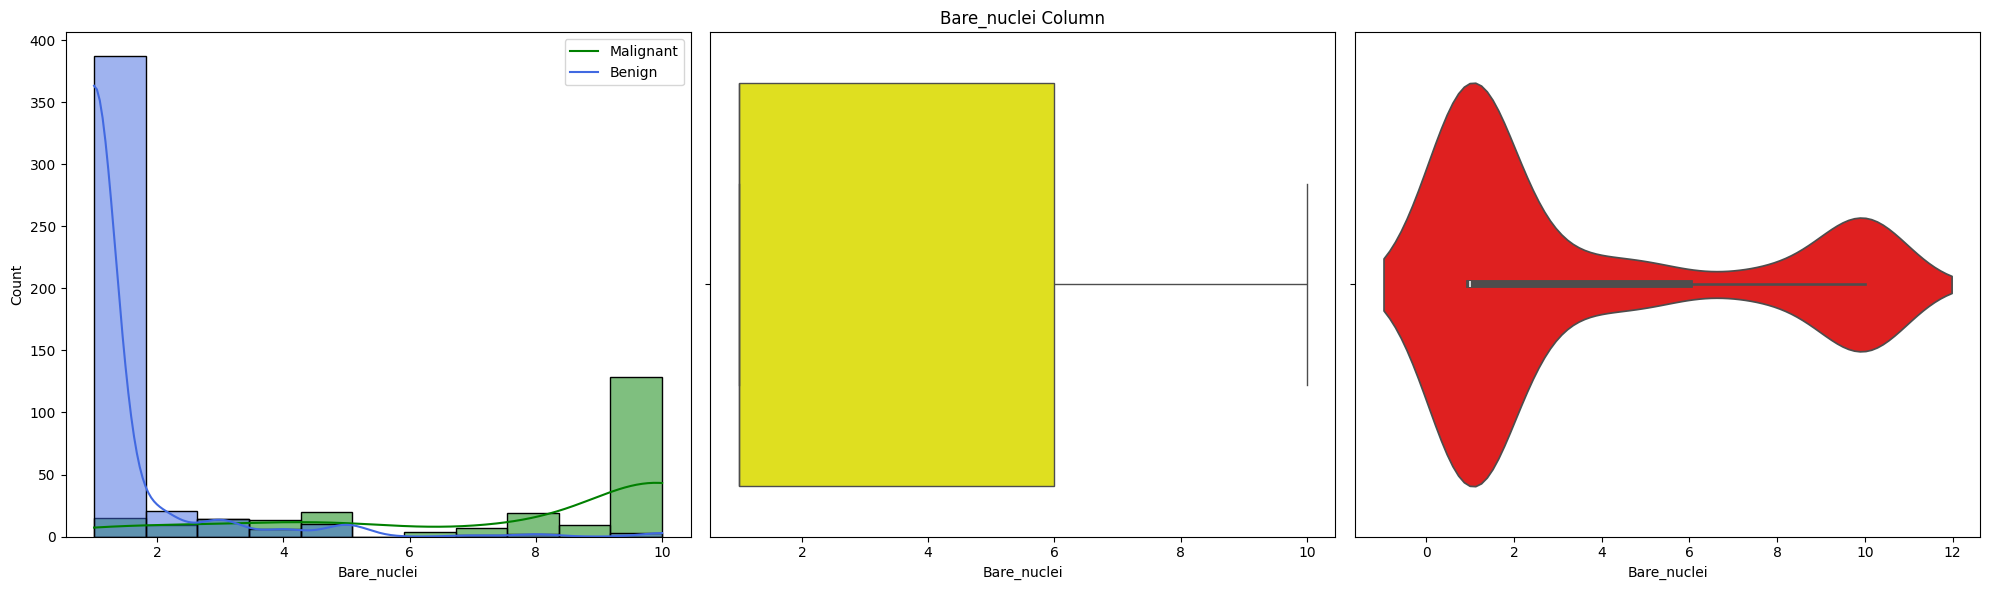

skewness in column Bland_chromatin: 1.0952704692627657


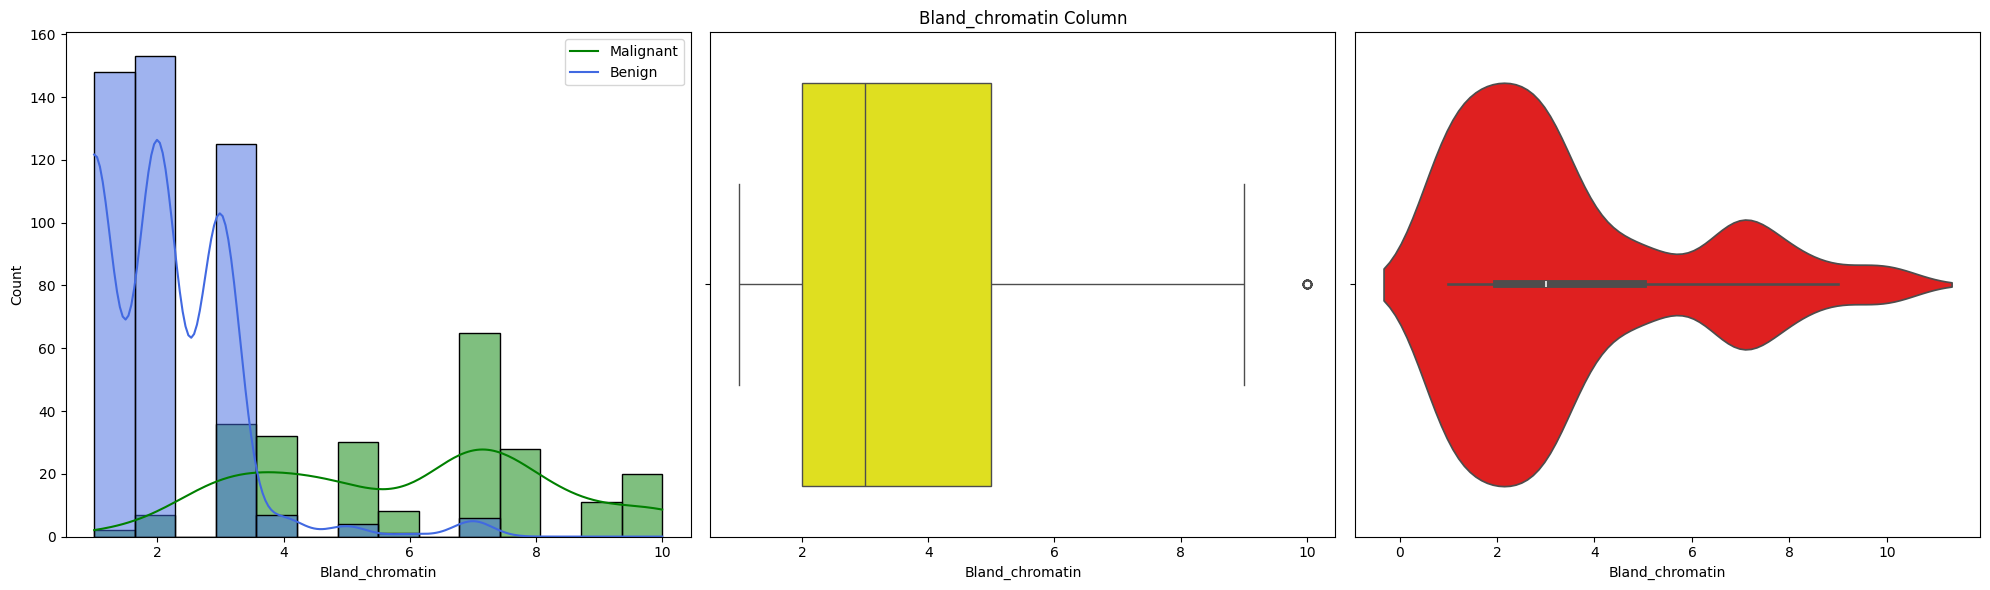

skewness in column Normal_nucleoli: 1.4204311236583553


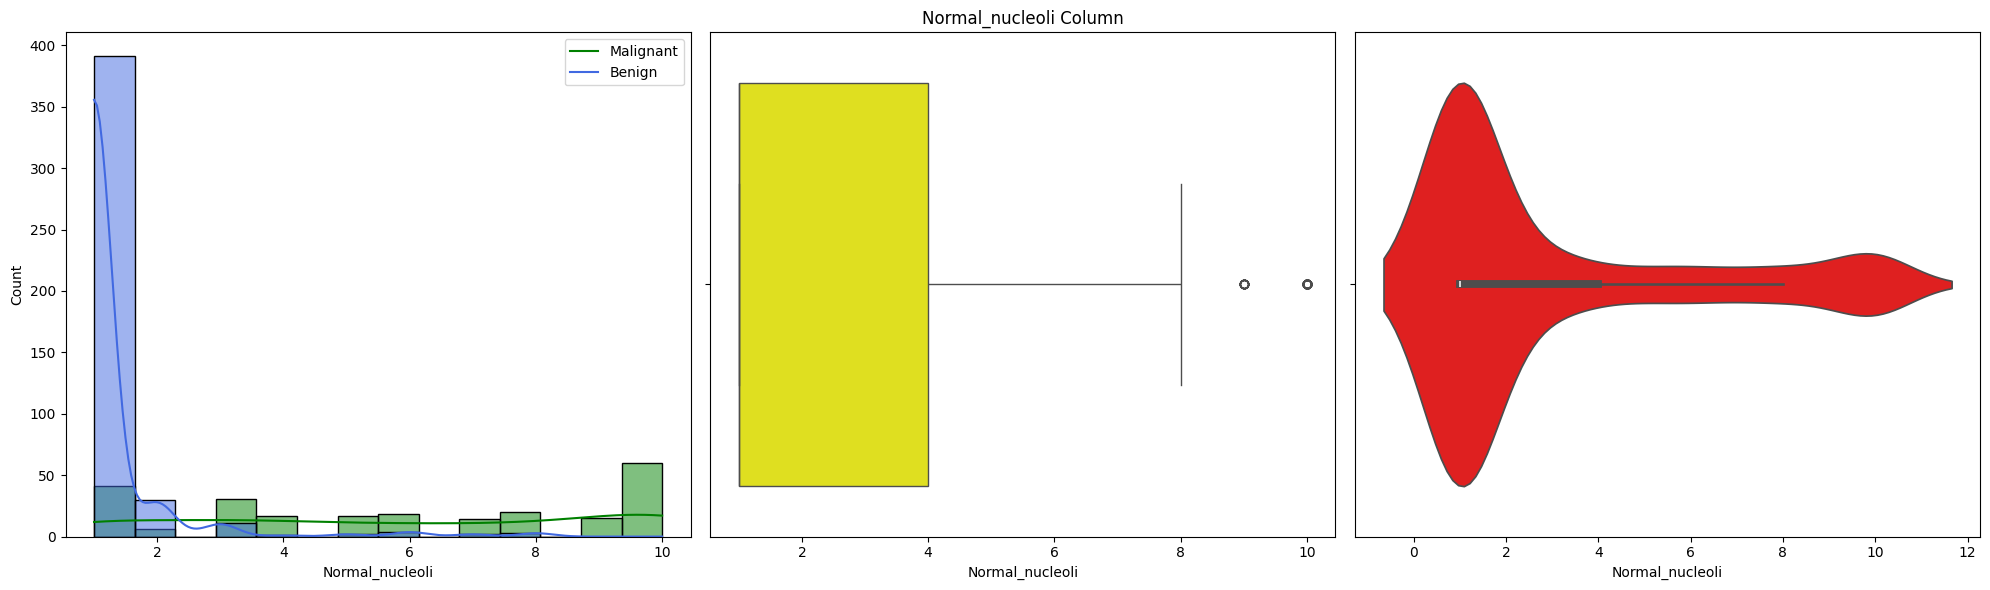

skewness in column Mitoses: 3.5114762411244103


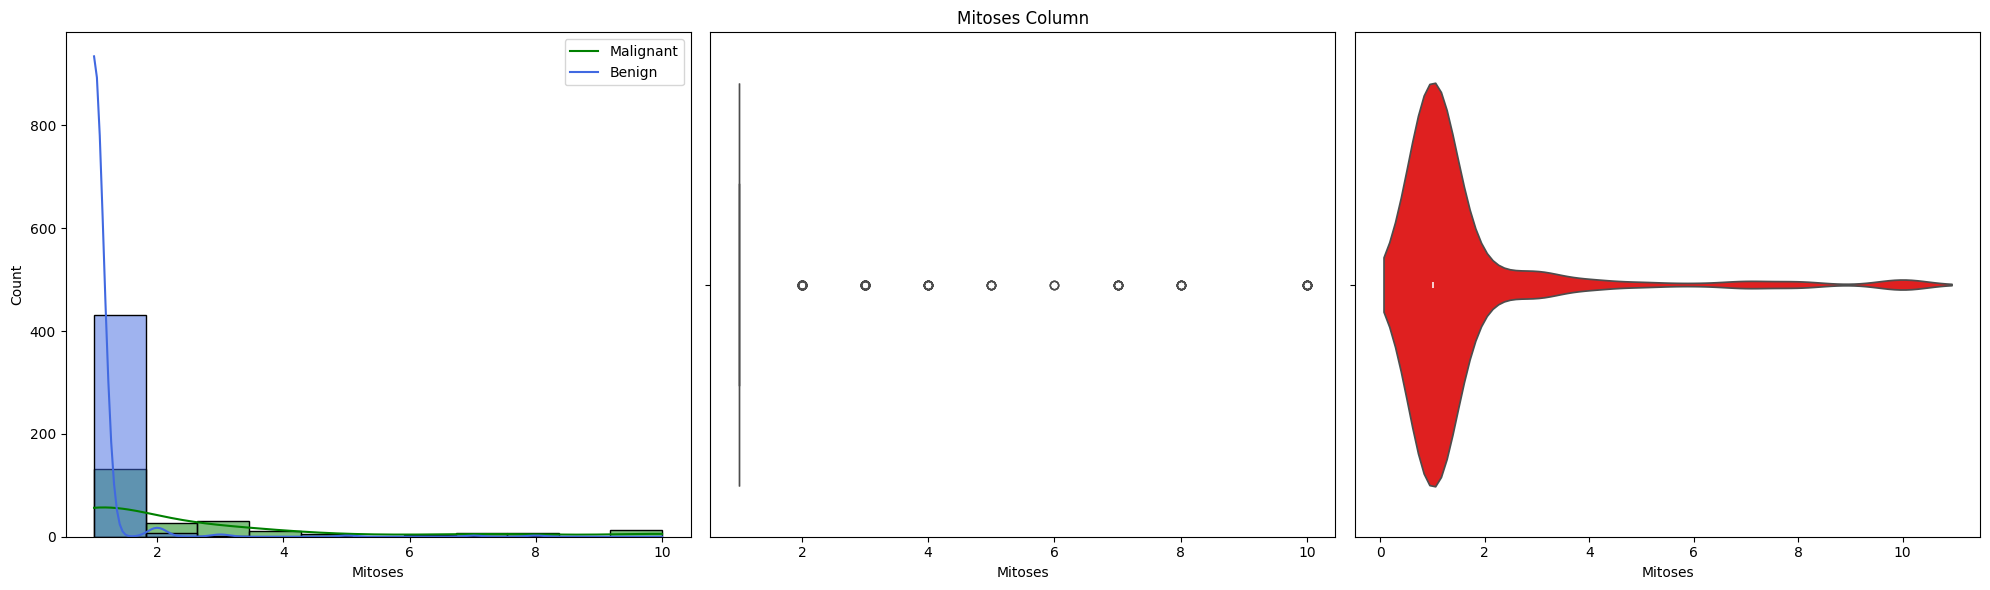

In [11]:
for col in df.drop("target", axis=1).columns:
    plt.figure(figsize = (20,6))
    print(f"skewness in column {col}: {df[col].skew()}")
    plt.subplot(131), sns.histplot(data = df, x =col,  hue='target', kde=True, palette = ['royalblue','green'])
    plt.legend(labels=["Malignant", "Benign"])
    plt.subplot(132), sns.boxplot(x = df[col], color = 'yellow', )
    plt.title(f"{col} Column", loc = 'center')
    plt.subplot(133), sns.violinplot(x = df[col], color = "red")
    plt.tight_layout()
    plt.savefig(f"{save_path}/{col}_data_analysis.png")
    plt.show()
    

In [12]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

Clump_thickness: [ 5  3  6  4  8  1  2  7 10  9]
Uniformity_of_cell_size: [ 1  4  8 10  2  3  7  5  6  9]
Uniformity_of_cell_shape: [ 1  4  8 10  2  3  5  6  7  9]
Marginal_adhesion: [ 1  5  3  8 10  4  6  2  9  7]
Single_epithelial_cell_size: [ 2  7  3  1  6  4  5  8 10  9]
Bare_nuclei: [ 1 10  2  4  3  9  7  5  8  6]
Bland_chromatin: [ 3  9  1  2  4  5  7  8  6 10]
Normal_nucleoli: [ 1  2  7  4  5  3 10  6  9  8]
Mitoses: [ 1  5  4  2  3  7 10  8  6]
target: [2 4]


## Model Selection

In [13]:
%%capture
! pip install xgboost

In [14]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [15]:
X = df.drop('target', axis=1)
y = df['target']
label_enc = LabelEncoder()
y = label_enc.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [16]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [17]:
models = {
    "XGBoost": (XGBClassifier(), {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.01]}),
    "Decision Tree": (DecisionTreeClassifier(), {'max_depth': [None, 10, 20]}),
    "Random Forest": (RandomForestClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}),
    "MLP": (MLPClassifier(), {'hidden_layer_sizes': [(50,), (100,), (50, 15), (15,2)], 'max_iter': [500, 650]}),
    "SVM": (SVC(), {'C': [1, 10], 'kernel': ['linear', 'rbf']}),
    "Logistic Regression": (LogisticRegression(), {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs'], 'max_iter': [100, 200]})
}

In [19]:
import pickle
os.makedirs('models')
model_path = 'models'

accuracies=[]
precisions=[]
recalls=[]
f1_scores=[]

for name, (model, param_grid) in models.items():
    print(f"Training {name}...")
    # Initialize GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5)
    
    # Train the model
    grid_search.fit(X_train_scaled, y_train)
    
    # Step 4: Evaluation
    print(f"Evaluating {name}...")
    y_pred = grid_search.predict(X_test_scaled)
    
    # Calculate evaluation metrics
    accuracy = grid_search.score(X_test_scaled, y_test)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    precision = classification_rep['weighted avg']['precision']
    recall = classification_rep['weighted avg']['recall']
    f1_score = classification_rep['weighted avg']['f1-score']
    
    # Append metrics to lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)
    
    # Print evaluation metrics
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    
    with open(f'models/{name}_model.pkl', 'wb') as f:
        pickle.dump(model, f)
    
    print("===================================")

Training XGBoost...
Evaluating XGBoost...
Confusion Matrix for XGBoost:
[[95  3]
 [ 2 37]]
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        98
           1       0.93      0.95      0.94        39

    accuracy                           0.96       137
   macro avg       0.95      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137

Training Decision Tree...
Evaluating Decision Tree...
Confusion Matrix for Decision Tree:
[[95  3]
 [ 1 38]]
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        98
           1       0.93      0.97      0.95        39

    accuracy                           0.97       137
   macro avg       0.96      0.97      0.96       137
weighted avg       0.97      0.97      0.97       137

Training Random Forest...
Evaluating Random Forest...
Confusion Matrix

c:\Users\Akanksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Akanksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Akanksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Akanksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached 

Evaluating MLP...
Confusion Matrix for MLP:
[[94  4]
 [ 1 38]]
Classification Report for MLP:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        98
           1       0.90      0.97      0.94        39

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Training SVM...
Evaluating SVM...
Confusion Matrix for SVM:
[[94  4]
 [ 1 38]]
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        98
           1       0.90      0.97      0.94        39

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Training Logistic Regression...
Evaluating Logistic Regression...
Confusion Matrix for Logistic Regression:
[[96  2]
 [ 1 38]]
Classification 

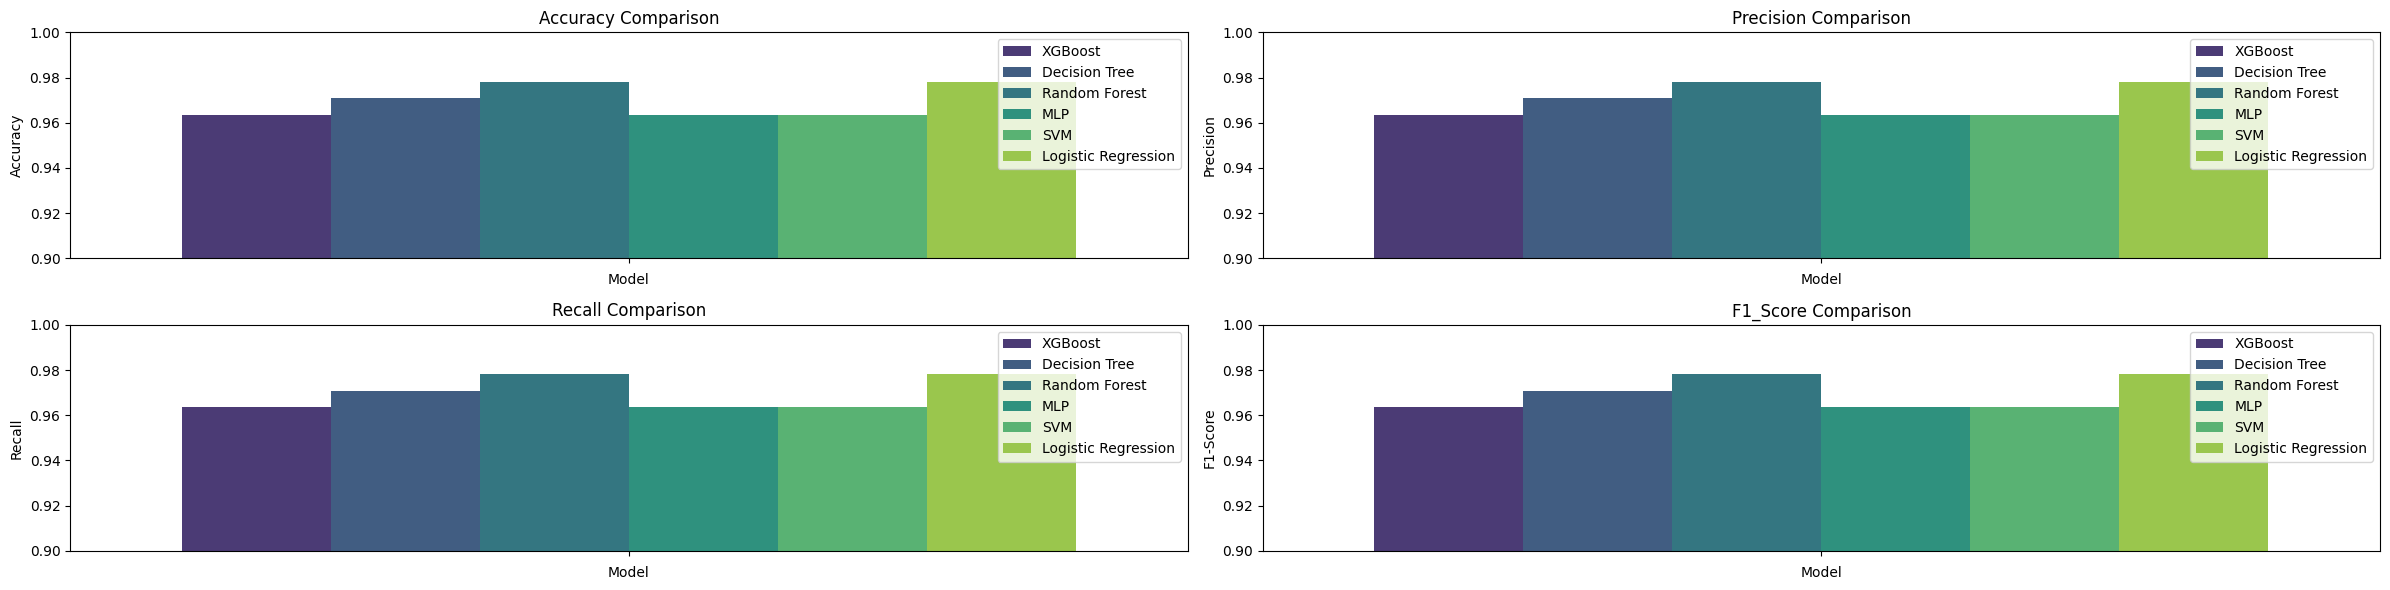

In [20]:
import matplotlib
matplotlib.rcParams['font.size']=10

plt.figure(figsize=(24,6))

plt.subplot(221), sns.barplot(hue=list(models.keys()), y=accuracies, palette='viridis')
plt.title('Accuracy Comparison'), plt.xlabel('Model'), plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0), plt.xticks(rotation=45)
plt.savefig(f"{save_path}/accuracy.png")

plt.subplot(222), sns.barplot(hue=list(models.keys()), y=accuracies, palette='viridis')
plt.title('Precision Comparison'), plt.xlabel('Model'), plt.ylabel('Precision')
plt.ylim(0.9, 1.0), plt.xticks(rotation=45)
plt.savefig(f"{save_path}/precision.png")

plt.subplot(223), sns.barplot(hue=list(models.keys()), y=accuracies, palette='viridis')
plt.title('Recall Comparison'), plt.xlabel('Model'), plt.ylabel('Recall')
plt.ylim(0.9, 1.0), plt.xticks(rotation=45)
plt.savefig(f"{save_path}/recall.png")

plt.subplot(224), sns.barplot(hue=list(models.keys()), y=accuracies, palette='viridis')
plt.title('F1_Score Comparison'), plt.xlabel('Model'), plt.ylabel('F1-Score')
plt.ylim(0.9, 1.0), plt.xticks(rotation=45)
plt.savefig(f"{save_path}/f1_score.png")

plt.tight_layout()
plt.show()